In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wordcloud
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Data from respective disasters

tick_fire_df = pd.read_csv('./tick_fire_20191026.csv')
saddleridge_fire_df = pd.read_csv('./saddleridge_fire_20191021.csv')
kincade_fire_df = pd.read_csv('./kincade_fire_20191023.csv')
getty_fire_df = pd.read_csv('./getty_fire_20191028.csv')
latuna_fire_df = pd.read_csv('./latuna_fire_tweets_20170901.csv')


In [3]:
getty_fire_df.columns = ['Unnamed: 0', 'time', 'text', 'long', 'lat']

In [4]:
fire_df = pd.concat([tick_fire_df, saddleridge_fire_df, kincade_fire_df, getty_fire_df, latuna_fire_df], sort=True)
fire_df = fire_df.drop_duplicates().reset_index(drop=True)

In [5]:
fire_df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
fire_df.drop_duplicates(subset =['text'], inplace=True)

In [7]:
fire_df.head()

,lat,long,text,time
0,-118.542587,34.391663,b'RT @CBSLA: #LIVE: New flames flare-up near M...,2019-10-28 19:01:05
1,-118.542587,34.391663,b'RT @PauleyP: Los Angeles is ON FIRE AND BURN...,2019-10-28 19:01:05
2,-118.542587,34.391663,"b'RT @skbaer: @mgafni Last week, PG&amp;E repo...",2019-10-28 19:01:05
3,-118.542587,34.391663,b'RT @LAist: When driving to safety during a w...,2019-10-28 19:01:04
4,-118.542587,34.391663,b'It smells like so much smoke here in LA \xf0...,2019-10-28 19:01:02


In [8]:
fire_df.shape

(36561, 4)

In [9]:
fire_df['text'].isnull().sum()

0

In [10]:
# Create a new column that counts words in 'text' column
fire_df['words_count'] = fire_df['text'].apply(lambda x: len(x.split()))

In [11]:
# Create a new column that counts chars in 'text' column
fire_df['chars_count'] = fire_df['text'].apply(len)

In [12]:
fire_df.head()

,lat,long,text,time,words_count,chars_count
0,-118.542587,34.391663,b'RT @CBSLA: #LIVE: New flames flare-up near M...,2019-10-28 19:01:05,17,154
1,-118.542587,34.391663,b'RT @PauleyP: Los Angeles is ON FIRE AND BURN...,2019-10-28 19:01:05,29,154
2,-118.542587,34.391663,"b'RT @skbaer: @mgafni Last week, PG&amp;E repo...",2019-10-28 19:01:05,21,157
3,-118.542587,34.391663,b'RT @LAist: When driving to safety during a w...,2019-10-28 19:01:04,22,197
4,-118.542587,34.391663,b'It smells like so much smoke here in LA \xf0...,2019-10-28 19:01:02,16,88


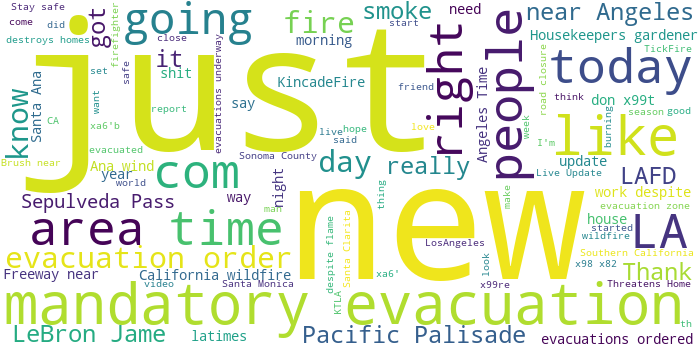

In [13]:
custom_stop = list(ENGLISH_STOP_WORDS)
custom_stop.extend(["b'RT", "xe2", "x80", "x99", "xf0", "htpps", "xa6", "x9f", "Getty Center", "Los Angeles",
                    "Los Angele", "Getty", "x99m", "x99s", "Los", "Angele", "taco truck", "outfit", "taco", "truck",
                   "http", "https", "x94", "xa5", "nhttp", "nhttps", "b'", "Center", "amp", "GettyFire", "RT", "www",
                   "instagram", "xa6'b'RT", "xa6'b'", "xa6'RT", "xb8", "x9d", "xef", "x8f"])

wc = wordcloud.WordCloud(
        max_words = 300,
        stopwords = custom_stop,
        background_color = 'white',
        width = 700,
        height = 350,
        contour_width=3, 
        contour_color='steelblue',
        min_font_size = 10
        )

raw_title = fire_df['text'].str.cat()
    
wc.generate(raw_title).to_image()

In [14]:
X = fire_df['text']

In [15]:
cvec = CountVectorizer(stop_words=custom_stop, ngram_range=(1,1), min_df = 100, max_df = .90)

words_df = pd.DataFrame(
    cvec.fit_transform(X).todense(),
    columns=cvec.get_feature_names()
)

words_df.head()

c:\users\sibel\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['angele', 'angeles', 'center', 'getty', 'gettyfire', 'los', 'rt'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,000,10,101,12,15,19,20,2017,2019,28,...,xbb,xbc,xbd,xc2,yeah,year,years,yes,youtube,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


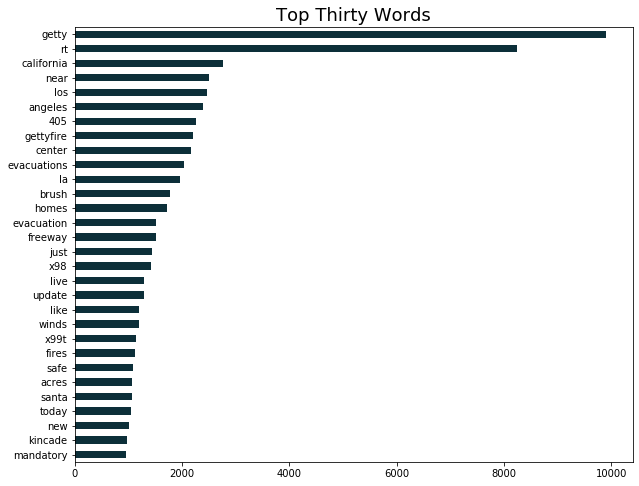

In [16]:
top_30 = words_df.sum().sort_values(ascending=True).tail(30)
plt.title('Top Thirty Words', fontsize=18)
top_30.plot.barh(color='#0C2F39', figsize= (10,8));

In [17]:
cvec = CountVectorizer(stop_words=custom_stop, ngram_range=(2,2), min_df = 100, max_df = .90)

bigrams_df = pd.DataFrame(
    cvec.fit_transform(X).todense(),
    columns=cvec.get_feature_names()
)

bigrams_df.head()

c:\users\sibel\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['angele', 'angeles', 'center', 'getty', 'gettyfire', 'los', 'rt'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,000 acres,10 000,405 freeway,500 acres,acres burned,air quality,ana winds,angeles department,angeles getty,angeles prompts,...,updates getty,warning issued,watch live,west 405,west la,widespread evacuations,work despite,x81 xa9,x98 x82,x98 xad
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


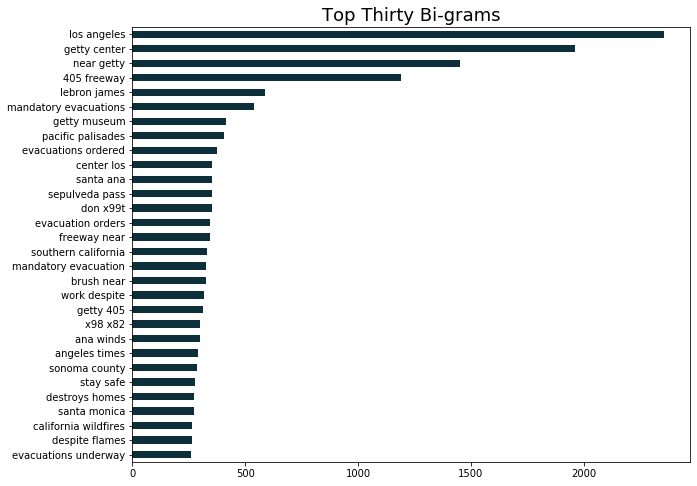

In [18]:
top_30_bigrams = bigrams_df.sum().sort_values(ascending=True).tail(30)
plt.title('Top Thirty Bi-grams', fontsize=18)
top_30_bigrams.plot.barh(color='#0C2F39', figsize= (10,8));

In [19]:
cvec = CountVectorizer(stop_words=custom_stop, ngram_range=(3,3), min_df = 100, max_df = .90)

trigrams_df = pd.DataFrame(
    cvec.fit_transform(X).todense(),
    columns=cvec.get_feature_names()
)

trigrams_df.head()

c:\users\sibel\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['angele', 'angeles', 'center', 'getty', 'gettyfire', 'los', 'rt'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,405 freeway destroys,405 freeway near,405 freeway threatens,angeles prompts evacuations,blaze burns 405,brush near getty,burns 405 freeway,center art safe,center los angeles,center prompts mandatory,...,los angeles department,los angeles getty,los angeles prompts,los angeles times,near getty center,prompts mandatory evacuations,red flag warning,santa ana winds,threatens thousands homes,work despite flames
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


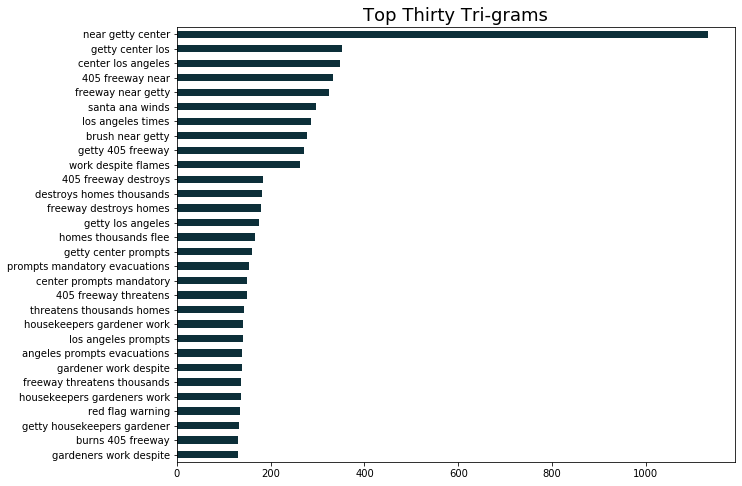

In [20]:
top_30_trigrams = trigrams_df.sum().sort_values(ascending=True).tail(30)
plt.title('Top Thirty Tri-grams', fontsize=18)
top_30_trigrams.plot.barh(color='#0C2F39', figsize= (10,8));

In [21]:
cvec = CountVectorizer(stop_words=custom_stop, ngram_range=(4,4), min_df = 100, max_df = .90)

quadgrams_df = pd.DataFrame(
    cvec.fit_transform(X).todense(),
    columns=cvec.get_feature_names()
)

quadgrams_df.head()

c:\users\sibel\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['angele', 'angeles', 'center', 'getty', 'gettyfire', 'los', 'rt'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,405 freeway destroys homes,405 freeway near getty,405 freeway threatens thousands,blaze burns 405 freeway,brush near getty center,burns 405 freeway near,center los angeles prompts,center prompts mandatory evacuations,destroys homes thousands flee,erupts near getty center,...,getty center art safe,getty center los angeles,getty center prompts mandatory,getty housekeepers gardener work,getty housekeepers gardeners work,housekeepers gardener work despite,housekeepers gardeners work despite,los angeles prompts evacuations,near getty center los,near getty center prompts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


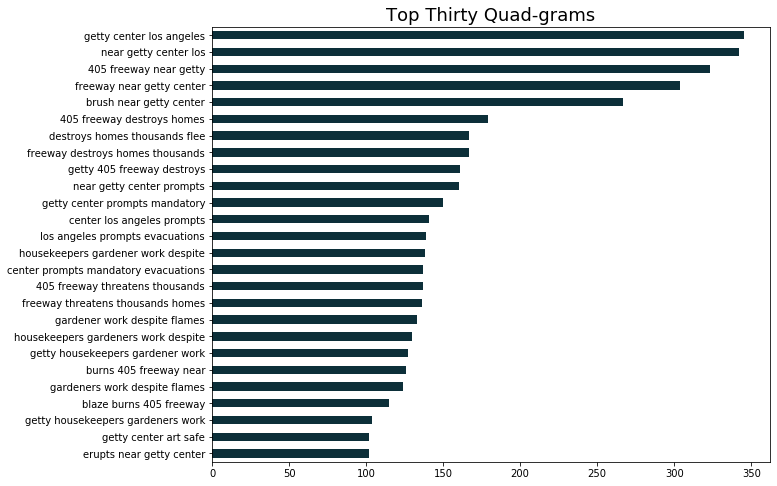

In [22]:
top_30_quadgrams = quadgrams_df.sum().sort_values(ascending=True).tail(30)
plt.title('Top Thirty Quad-grams', fontsize=18)
top_30_quadgrams.plot.barh(color='#0C2F39', figsize= (10,8));

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [24]:
# instantiate the sentiment analyzer
sia = SentimentIntensityAnalyzer() 

In [25]:
# Write a function to get the compound sentiment scores for a post
def get_compound(text):
    return sia.polarity_scores(text)['compound']

NameError: name 'text' is not defined

In [26]:
# apply the function to the entire subreddit dataframe
fire_df['sentiment'] = fire_df['text'].apply(get_compound)

In [27]:
fire_df.shape

(36561, 7)

In [28]:
# look at the distribution of the composite sentiment score
fire_df['sentiment'].mean()

-0.20569102595662042

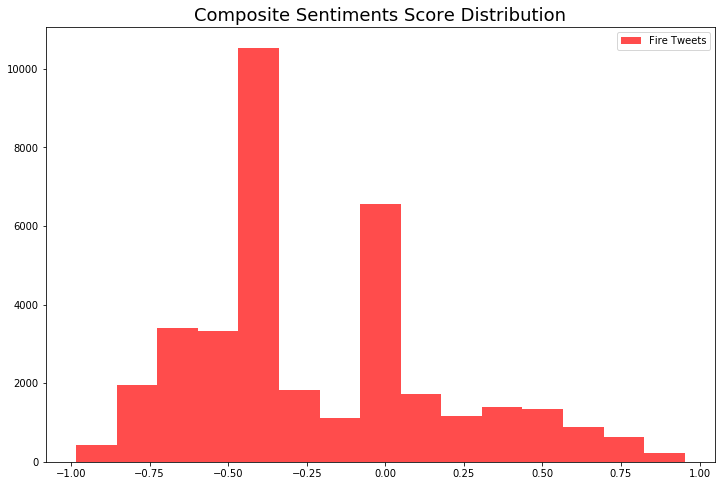

In [29]:
# Composite sentiment score histogram
fig, ax = plt.subplots(figsize = (12, 8))
plt.title('Composite Sentiments Score Distribution', fontsize=18)

fire_df['sentiment'].hist(ax=ax, color='red', label='Fire Tweets', 
                                                                  bins=15, alpha=0.7, grid=False)

ax.legend(loc='best');

test  
               
               test2  
    test3